https://github.com/mhorlbeck/ScreenProcessing

 https://github.com/goodarzilab/iAnalyzer

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [81]:
import pandas as pd 
import sys 
from venn import venn 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from scipy import stats


sys.path.append("../")
from util import *

In [112]:
def compare_pipelines(m_path,h_path):
    m = read_genetable_collapsed(m_path,'rho')
    h = pd.read_csv(h_path,sep='\t').set_index('gene')

    genes = set(m.index).intersection(h.index)

    m = m.loc[genes,:].astype(float)
    h = h.loc[genes,:].astype(float).iloc[:,[0,2]]

    df = pd.concat([m,h],axis=1).filter(like='rho').rename(columns={'rho score': 'max pipeline','rho': 'iAnalyzeR'}).astype(float)
    
    return df,m,h

def top (a,fc_thr=0,pv_thr=0.05):
    dn = a.loc[(a.iloc[:,0] > fc_thr)&(a.iloc[:,1] < pv_thr),:].index.tolist()    
    up = a.loc[(a.iloc[:,0] <= -1*(fc_thr))&(a.iloc[:,1] < pv_thr),:].index.tolist()
    
    return up,dn

def plot_venn(m,h,title):
    _, axs = subplots(ncols=2, nrows=1, figsize=(9, 4),dpi=300)

    mu,md = top(m)
    hu,hd = top(h)

    data0 = {
        'max pipeline up': set(mu),
        'iAnalyzeR up': set(hu),    
    }

    venn(data0,fontsize=10,legend_loc="upper left",ax=axs[0])

    data1 = {
        'max pipeline dn': set(md),
        'iAnalyzeR dn': set(hd)
    }

    venn(data1,fontsize=10,legend_loc="upper left",ax=axs[1])

Using my `iAnalyzeR-r` env to run `univariate_analysis.R` script. 

# Up 
## `fc_thr`   > 0
## `pv_thr`  < 0.05

# Down 
## `fc_thr`   =< 0 
## `pv_thr`  < 0.05

### hl60_exp1

#### DAC Drug:

In [7]:
!nohup Rscript univariate_analysis.R hl60_exp1 DAC_meta.txt ~sample.type T0 SES DAC_de.txt > hl60_exp1/DAC_de.log

nohup: ignoring input and redirecting stderr to stdout


In [113]:
m_path = 'hl60_exp1/DAC_processing_output_genetable_collapsed.txt'
h_path = 'hl60_exp1/DAC_de.txt'

hl60_exp_1_dac,m,h  = compare_pipelines(m_path,h_path)

In [61]:
hl60_exp_1_dac.to_csv('hl60_exp_1_dac.csv')

In [22]:
stats.spearmanr(hl60_exp_1_dac,axis=0)

SpearmanrResult(correlation=0.01926815169723306, pvalue=0.1949131137428832)

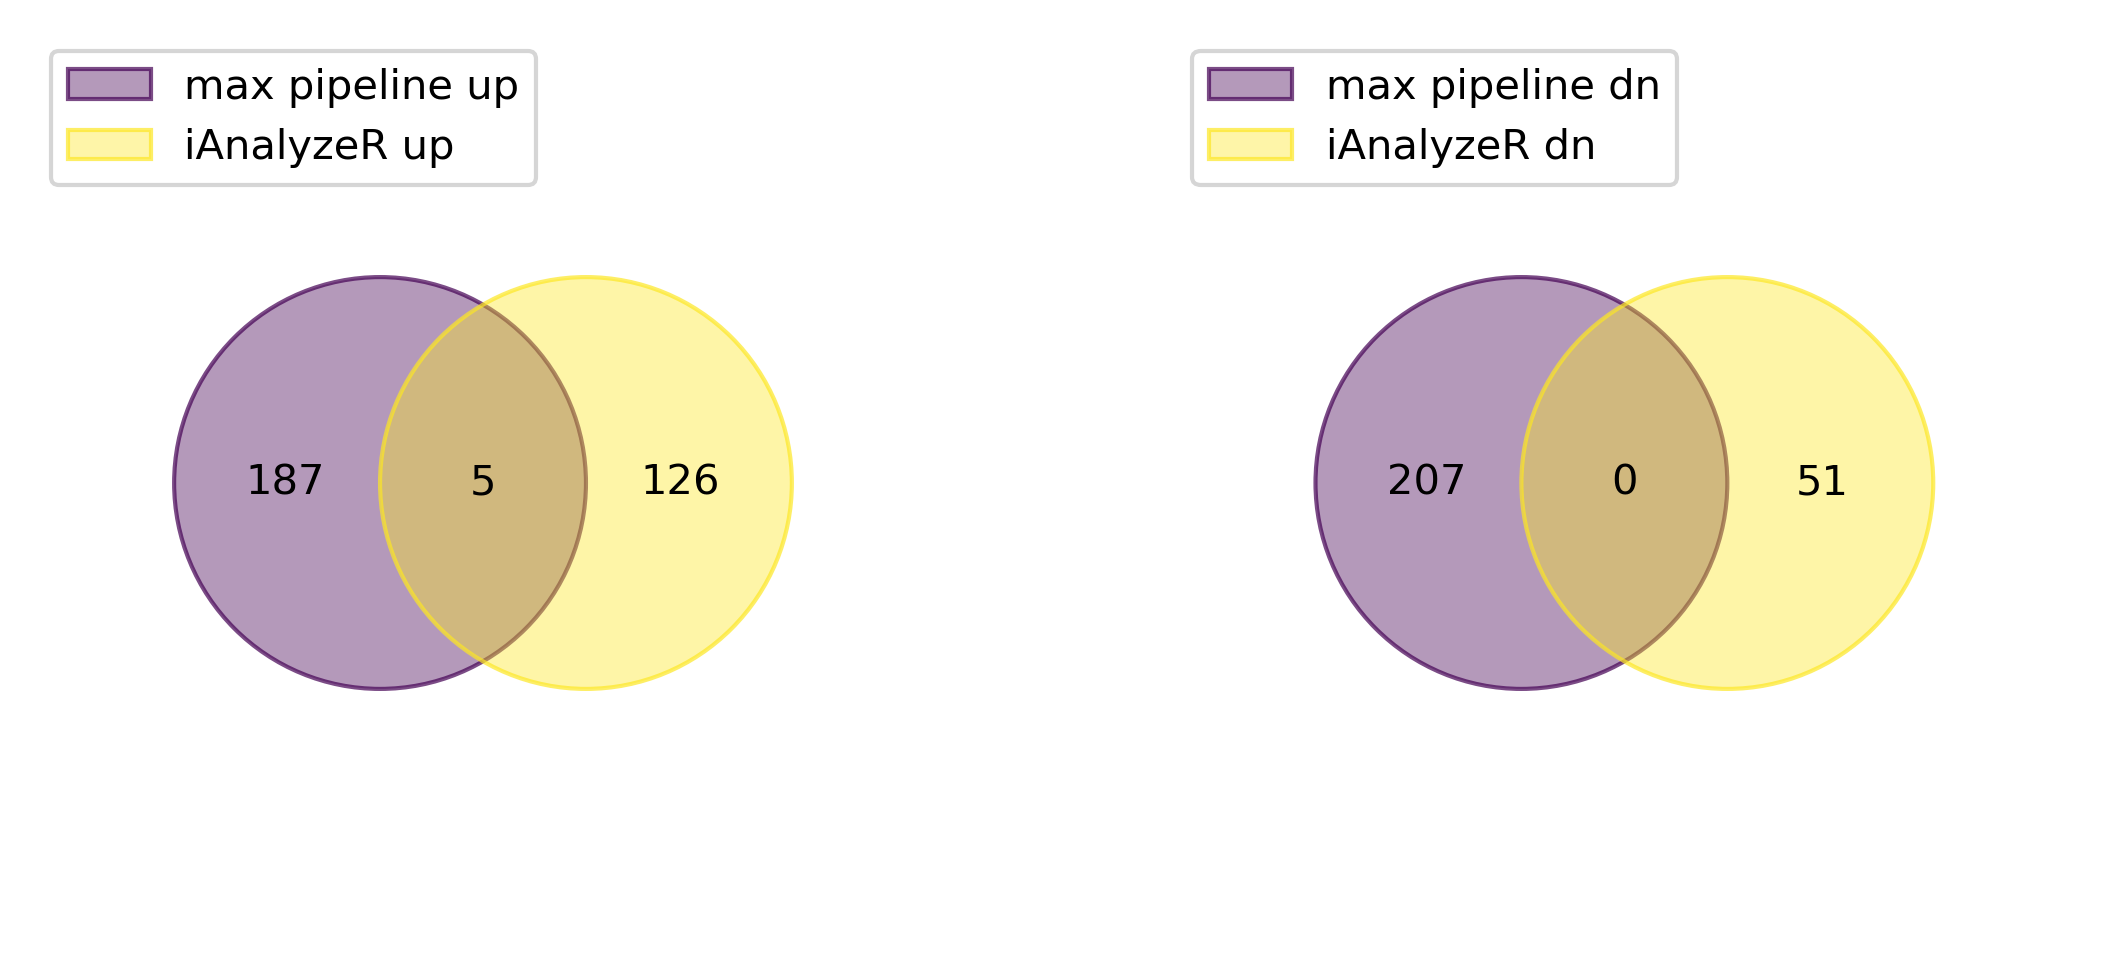

In [114]:
plot_venn(m,h,'hl60_exp_1_dac')

### hl60_exp2

#### DAC Drug:

In [10]:
!nohup Rscript univariate_analysis.R hl60_exp2 DAC_meta.txt ~sample.type T0 SES DAC_de.txt > hl60_exp2/DAC_de.log

nohup: ignoring input and redirecting stderr to stdout


In [106]:
m_path = 'hl60_exp2/DAC_processing_output_genetable_collapsed.txt'
h_path = 'hl60_exp2/DAC_de.txt'

hl60_exp_2_dac,m,h = compare_pipelines(m_path,h_path)

In [64]:
hl60_exp_2_dac.to_csv('hl60_exp_2_dac.csv')

In [107]:
stats.spearmanr(hl60_exp_2_dac,axis=0)

SpearmanrResult(correlation=-0.0005408595234830886, pvalue=0.9650495024755673)

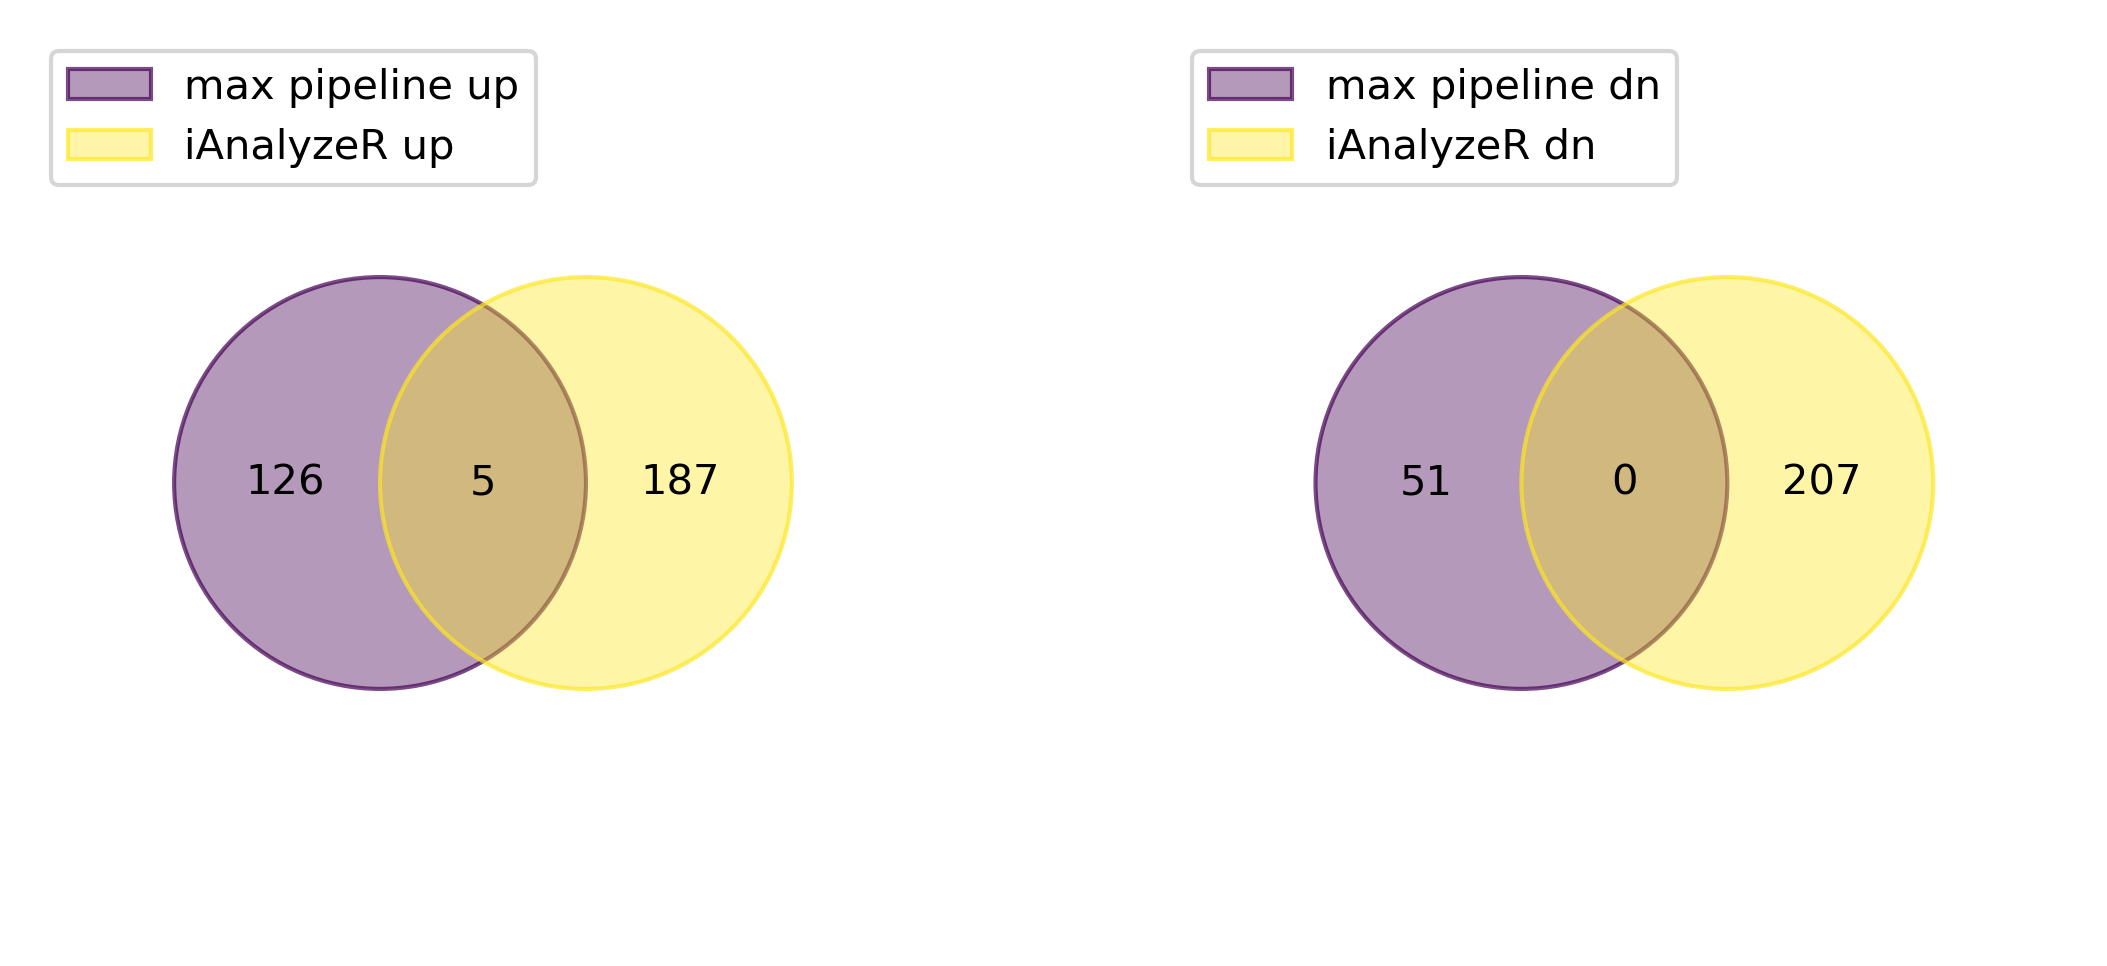

In [115]:
plot_venn(h,m,'hl60_exp_2_dac')

#### GSK Drug:

In [11]:
!nohup Rscript univariate_analysis.R hl60_exp2 GSK_meta.txt ~sample.type T0 SES GSK_de.txt > hl60_exp2/GSK_de.log

nohup: ignoring input and redirecting stderr to stdout


In [118]:
m_path = 'hl60_exp2/GSK_processing_output_genetable_collapsed.txt'
h_path = 'hl60_exp2/GSK_de.txt'

hl60_exp_2_gsk,m,h = compare_pipelines(m_path,h_path)

In [67]:
hl60_exp_2_gsk.to_csv('hl60_exp_2_gsk.csv')

In [119]:
stats.spearmanr(hl60_exp_2_gsk,axis=0)

SpearmanrResult(correlation=-0.02933585792069163, pvalue=0.019729289330373)

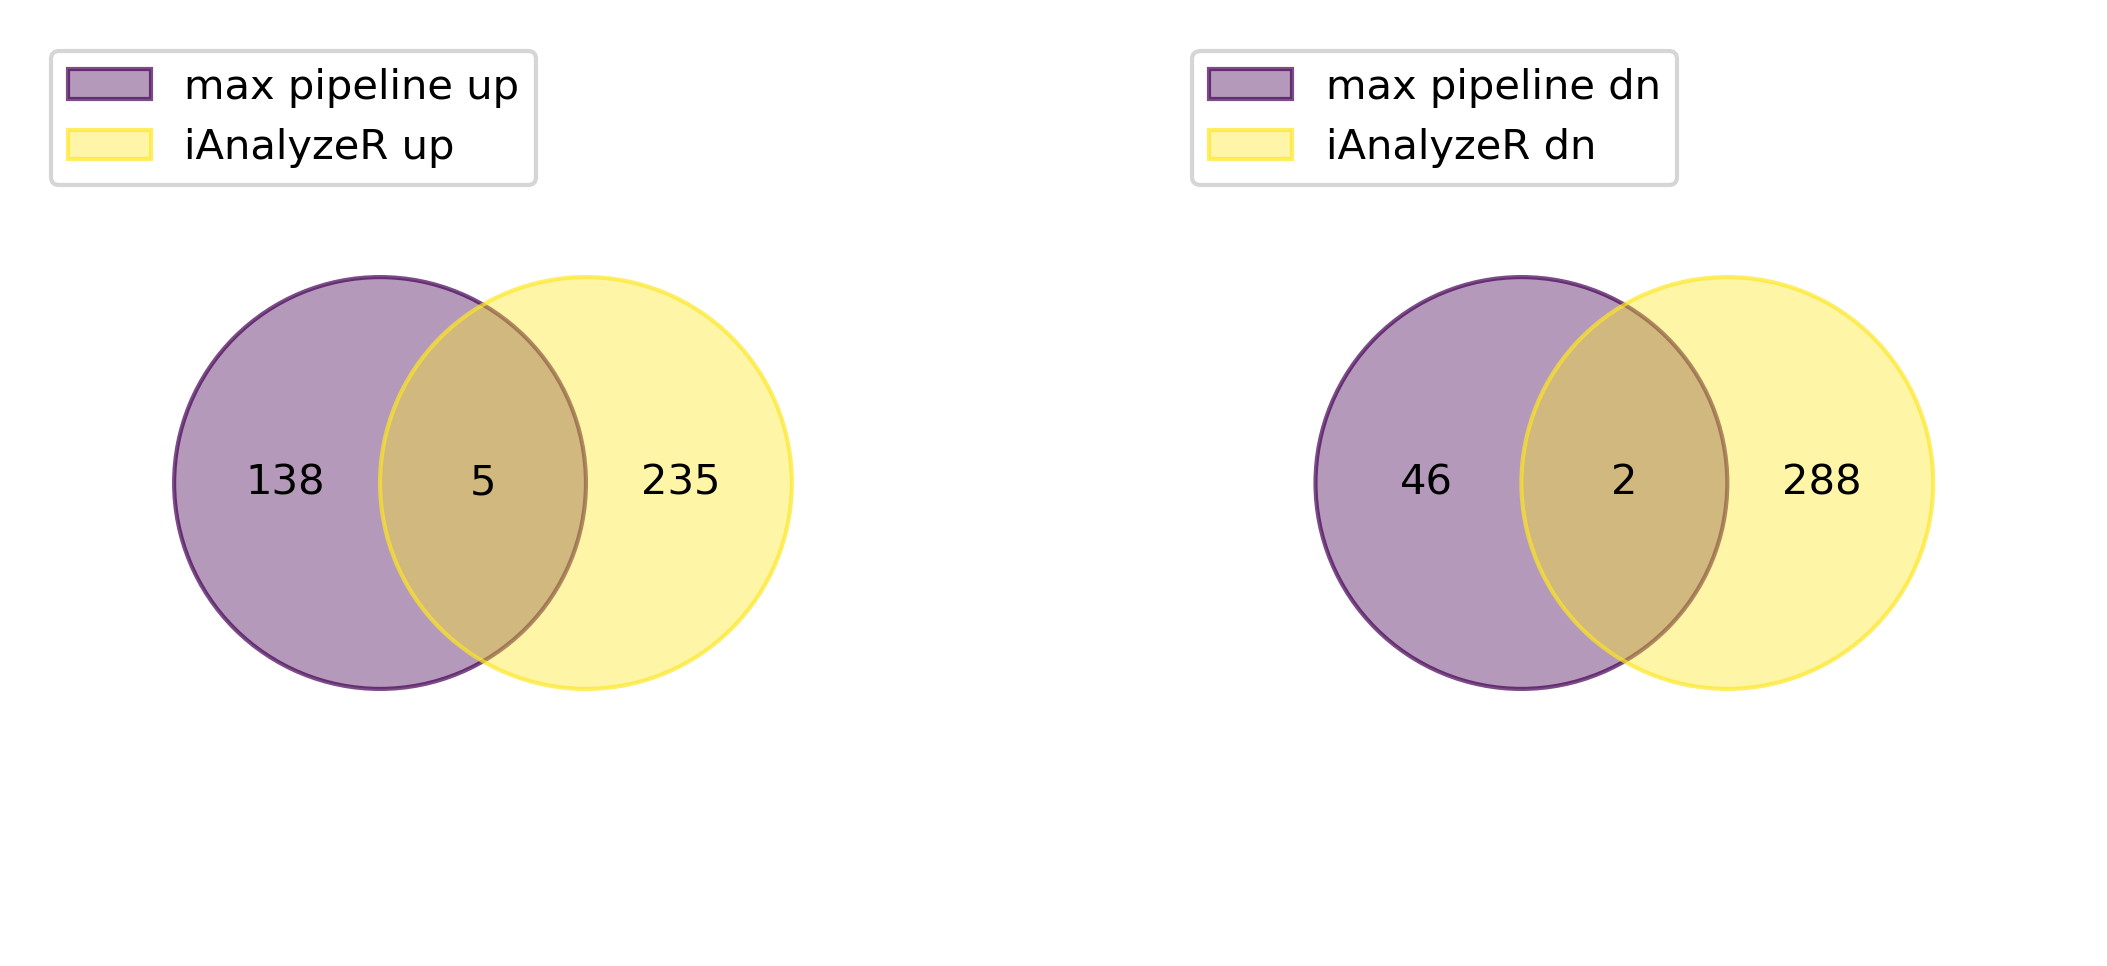

In [120]:
plot_venn(h,m,'hl60_exp_2_dac')

### molm13_exp

#### DAC Drug:

In [2]:
!nohup Rscript univariate_analysis.R molm13_exp DAC_meta.txt ~sample.type T0 SES DAC_de.txt > molm13_exp/DAC_de.log

nohup: ignoring input and redirecting stderr to stdout


In [5]:
cat molm13_exp/DAC_de.log


── Column specification ────────────────────────────────────────────────────────
cols(
  sample = col_character(),
  fastq = col_character(),
  lib.type = col_logical(),
  sample.type = col_character(),
  sample.rep = col_double()
)

[1] "count/T0_Rep1.cnt"   "count/DAC_Rep1.cnt"  "count/DAC_Rep2.cnt" 
[4] "count/DMSO_Rep1.cnt" "count/DMSO_Rep2.cnt"
[1] "Count matrix was filtered down to 316 rows (initially 3987)."
Error in get_oos_estimates(x, standardize, method_names, k, r, cluster,  : 
  Cannot do k-fold CV with fold size < 3; decrease k, set loo = TRUE, or out_of_sample = FALSE
Calls: bestNormalize -> get_oos_estimates
Execution halted


In [15]:
# m_path = 'molm13_exp/process_screen_output/processing_output_DAC_nextseq/DACnextseq_process_experiments_genetable_collapsed.xlsx'
# h_path = 'molm13_exp/DAC_de.txt'

# molm13_exp_dac = compare_pipelines(m_path,h_path)

In [64]:
# molm13_exp_dac.to_csv('molm13_exp_dac.csv')

In [65]:
# stats.spearmanr(molm13_exp_dac,axis=0)

SpearmanrResult(correlation=-0.0010750348522162905, pvalue=0.9306492049348263)

#### GSK Drug:

In [3]:
!nohup Rscript univariate_analysis.R molm13_exp GSK_meta.txt ~sample.type T0 SES GSK_de.txt > molm13_exp/GSK_de.log

nohup: ignoring input and redirecting stderr to stdout
